In [1]:
from PIL import Image, ImageFont, ImageDraw
from datetime import datetime

* Instagram size
    * square image
      * 1080px by 1080px
    * story
      * 1080px by 1920px

In [2]:
from PIL import Image

class ImageMani:
    def __init__(self, image_path, mode):
        self.image_path = image_path
        self.image = Image.open(image_path)
        self.original_width, self.original_height = self.image.size
        self.cropped_image = None
        self.mode = mode

    def crop_center_square(self, crop_width):
        center_x = self.original_width // 2
        center_y = self.original_height // 2

        half_crop_width = crop_width // 2
        left = center_x - half_crop_width
        top = center_y - half_crop_width
        right = left + crop_width
        bottom = top + crop_width

        self.cropped_image = self.image.crop((left, top, right, bottom))

        return self.cropped_image

    def crop_center_story(self, crop_width):
        original_aspect_ratio = self.original_width / self.original_height

        if original_aspect_ratio >= 9 / 16:
            crop_height = self.original_height
            crop_width = int(crop_height * 9 / 16)
        else:
            crop_width = self.original_width
            crop_height = int(crop_width * 16 / 9)

        center_x = self.original_width // 2
        center_y = self.original_height // 2

        left = center_x - crop_width // 2
        top = center_y - crop_height // 2
        right = left + crop_width
        bottom = top + crop_height

        self.cropped_image = self.image.crop((left, top, right, bottom))

        return self.cropped_image

    def resize_cropped_image(self):
        if self.mode == 'square':
            newsize = (1080, 1080)
            self.cropped_image = self.crop_center_square(self.original_width)
        elif self.mode == 'story':
            newsize = (1080, 1920)
            self.cropped_image = self.crop_center_story(self.original_width)
            
        self.cropped_image = self.cropped_image.resize(newsize)

    def add_text(self, text, font_size=40, text_color=(255, 255, 255), position=(100, 100), font_path=None):
        if self.cropped_image is None:
            raise ValueError("Please crop and save the image before adding text.")

        draw = ImageDraw.Draw(self.cropped_image)

        if font_path is None:
            font = ImageFont.load_default()
        else:
            font = ImageFont.truetype(font_path, size=font_size)

        draw.text(position, text, font=font, fill=text_color)
    
    def place_image(self, image_path, resize = None, position=(0, 0)):
        if self.cropped_image is None:
            raise ValueError("Please crop and save the image before placing another image.")

        image_to_place = Image.open(image_path).convert("RGBA")

        if resize is not None:
            image_to_place = image_to_place.resize(resize)

        x, y = position
        if x < 0:
            x = self.cropped_image.width - image_to_place.width + x
        if y < 0:
            y = self.cropped_image.height - image_to_place.height + y

        self.cropped_image.paste(image_to_place, (x, y), mask=image_to_place)

    def show_image(self):
        if self.cropped_image is not None:
            self.cropped_image.show()
        else:
            self.image.show()
    
    def save_imgae(self, output_path):
        if self.cropped_image is None:
            raise ValueError("No image data.")
        else:
            self.cropped_image.save(output_path)

### Type 1

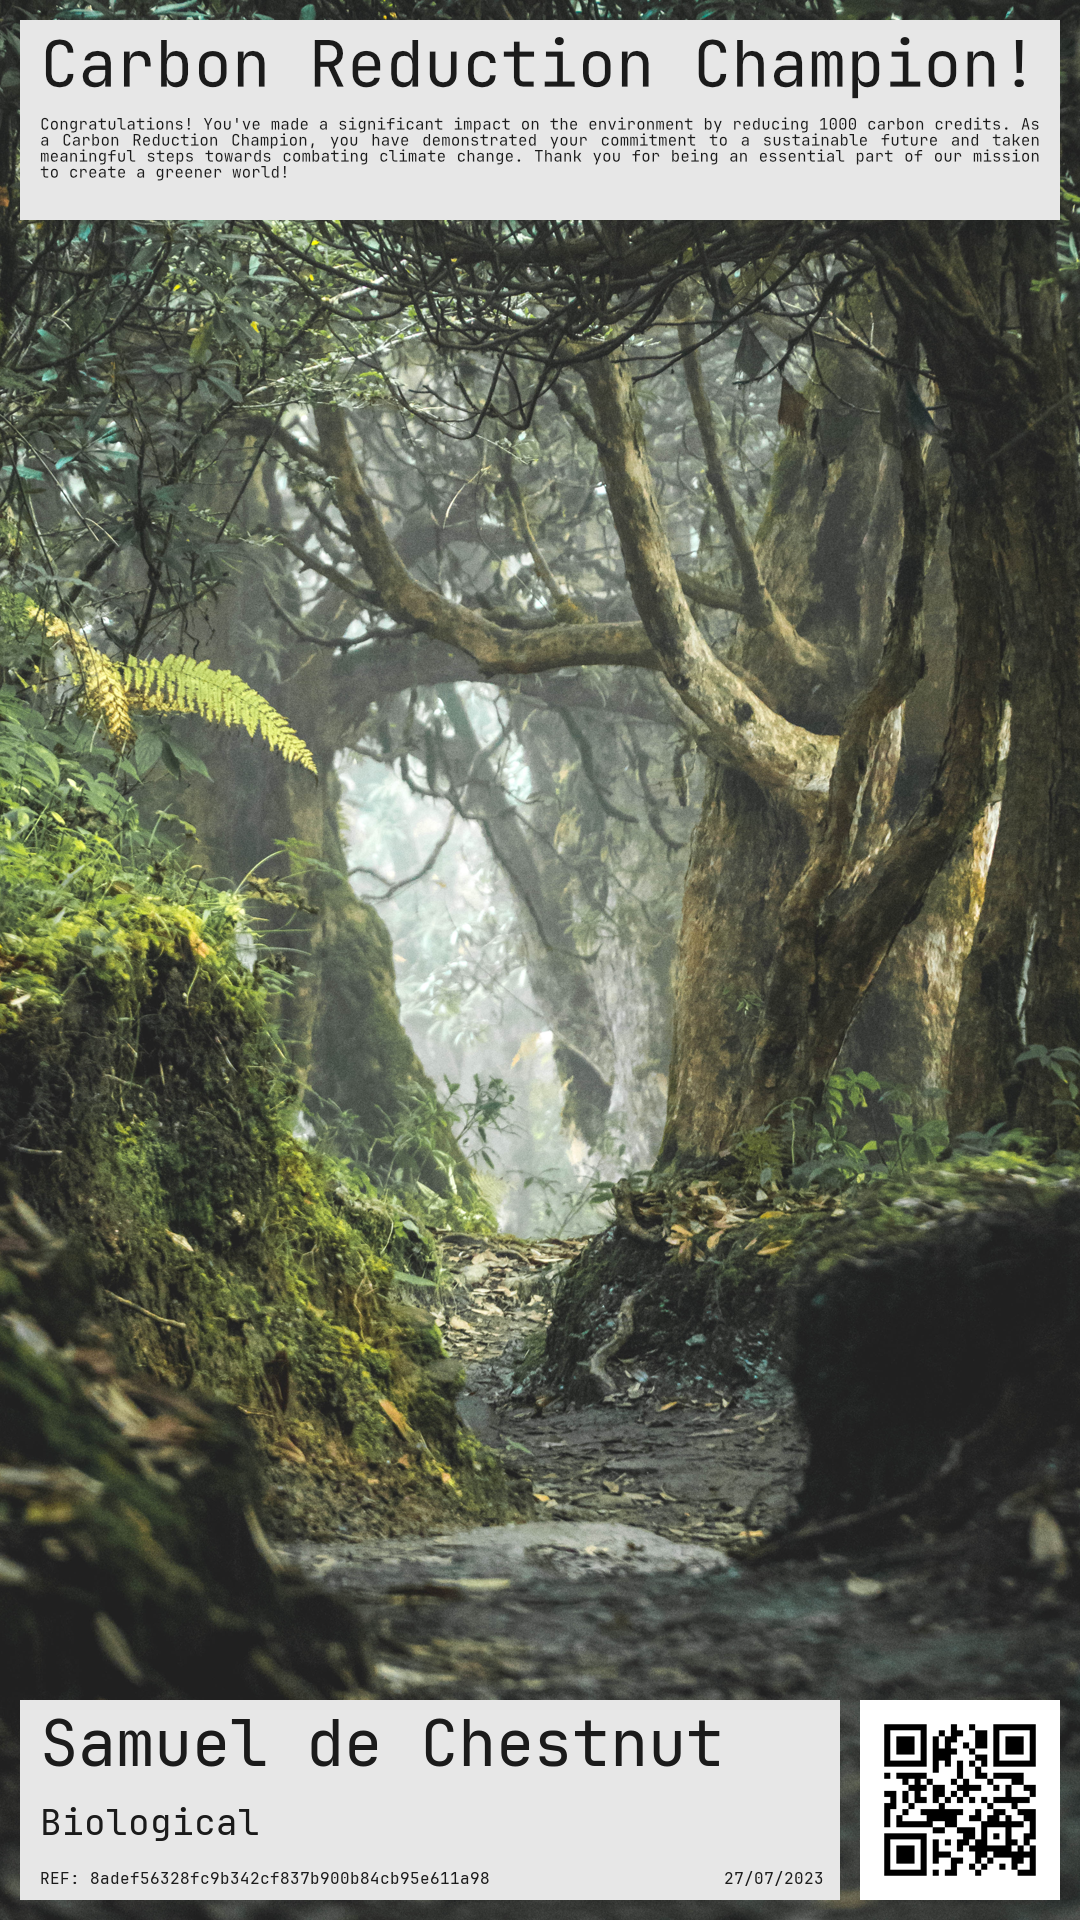

In [3]:
input_image_path = "./resource/101.jpg"
output_image_path = "output.jpg"
image_to_place_path  = "./resource/type1/element.png"
qrcode = "./resource/type1/MyQRCode1.png"
font_path = "./resource/font/JetBrainsMono-Regular.ttf"
cropper = ImageMani(input_image_path, mode='story')
cropper.resize_cropped_image()

place_position = (0, 0)
cropper.place_image(image_to_place_path, position=place_position)

user_name_text = "Samuel de Chestnut"
reward_type = "Biological"
ref_text = "REF: "+"8adef56328fc9b342cf837b900b84cb95e611a98"
current_datetime = datetime.now()

# Format the current date as "dd/mm/yyyy"
current_date = current_datetime.strftime("%d/%m/%Y")
date = f"{current_date}"
text_color = (27, 27, 27)
cropper.add_text(user_name_text, font_size=64, text_color=text_color, position=(40, 1700), font_path=font_path)
cropper.add_text(reward_type, font_size=36, text_color=text_color, position=(40, 1798), font_path=font_path)
cropper.add_text(ref_text, font_size=16, text_color=text_color, position=(40, 1867), font_path=font_path)
cropper.add_text(date, font_size=16, text_color=text_color, position=(724, 1867), font_path=font_path)
cropper.place_image(qrcode, resize=(200, 200), position=(860, 1700))

# Display the cropped image
cropper.show_image()
cropper.save_imgae(output_image_path)